## **Hồi quy tuyến tính (linear regression)**

# Hồi quy tuyến tính đơn biến (simple linear regression)


1. Giới thiệu 

  Hàm hồi quy tuyến tính thường được sử dụng để dự đoán các giá trị trong phạm vi liên tục. Đầu ra là dự đoán là giá trị liên tục và có độ dóc không đổi. \\
  
  Giả định (assumption)
- Mối liên quan giữa X và Y phải là tuyến tính (linear) về tham số.
- X không có sai số ngẫu nhiên (fit value) 
- Giá trị Y độc lập với nhau (y1 không liên quan với y2)
- Sai số ngẫu nhiên (e): phân bố chuẩn,trung bình 0, phương sai bất biến e~N(0,σ^2) \\

  Mục tiêu mô hình
Ước tính (estimate) tham số a và b thông qua các bộ dữ liệu thực nghiệm

  Phương trình có dạng:
\begin{align}
\bar{y_i} &= f(x_i) = w_0 + w_1x_i
\end{align}

2. Sai số dự đoán \\
Sai số dự đoán là sự chênh lệch giữa giá trị quan sát thực tế và dự đoán. 
\begin{align}
e = (y - \bar{y})
\end{align}
Trong thực tế các giá các giá trị dự đoán có thể nhỏ hơn giá trị quan sát, làm cho sai dự đoán là số ẩm ảnh hưởng đến quá trình dự đoán vì vậy ta cần bình phương chúng để khử các giá trị âm. 

  Để mô hình đạt dự đoán chính xác nhất thì phải đảm bảo rằng sai số dự đoán là bé nhất. Ta sử dụng đạo hàm để tìm giá trị nhỏ nhất để thuận tiện cho việc đạo hàm ta nhân các vế với 1/2.
\begin{align}
\frac{1}{2}e^2 = \frac{1}{2}(y - \bar{y})^2 = \frac{1}{2}(y - \bar{x}w)^2
\end{align}

3. Hàm mất mát Loss: \\
Từ phương trình trên ta được hàm loss cho tất cả các sai số của mẫu đầu vào:
\begin{align}
\mathcal{L}(w) &= \frac{1}{2n}\sum_{i=1}^n(y_i-\bar{y})^2 \\
&=\frac{1}{2n}\sum_{i=1}^n(y_i- w_0 - w_1x_i)^2
\end{align}

  Đạo hàm phương trình trên theo $w_0$ ta được kết quả:
  \begin{align}
  \frac{\delta(\mathcal{L}(w))}{\delta{w_0}} &= \frac{-1}{n}\sum_{i=1}^n
  (y_i- w_0 - w_1x_i) \\
  &= \frac{-1}{n}\sum_{i=1}^ny_i + w_0 + \frac{1}{n}\sum_{i=1}^nx_i\\
  &= -\bar{y} + w_0 + w_1\bar{x} 
  \end{align}
  Đạo hàm phương trình trên theo $w_1$ ta được kết quả:
  \begin{align}
  \frac{\delta(\mathcal{L}(w))}{\delta{w_1}} &= \frac{-1}{n}\sum_{i=1}^n
  x_i(y_i- w_0 - w_1x_i) \\
  &= \frac{-1}{n}\sum_{i=1}^nx_iy_i + w_0 \frac{1}{n}\sum_{i=1}^nx_i + \frac{1}{n}\sum_{i=1}^nx_i^2\\
  &= -\bar{xy} + w_0\bar{x} + w_1\bar{x^2}
  \end{align}
  Để hàm loss đạt cực trị:
  \begin{align}
  \frac{\delta(\mathcal{L}(w))}{\delta{w_0}} &= -\bar{y} + w_0 + w_1\bar{x} = 0 \\
  \frac{\delta(\mathcal{L}(w))}{\delta{w_1}} &= -\bar{xy} + w_0\bar{x} + w_1\bar{x^2} = 0
  \end{align}

  Từ 2 phương trình trên suy ra:
\begin{align}
w_1 &= \frac{\bar{x}\bar{y}-\bar{xy}}{\bar{x}^2-\bar{x^2}} \\
w_0 &= \bar{y} - w_1\bar{x}
\end{align}

Tính các giái trị:
\begin{align}
  \bar{x}  &=\frac{1}{n}\sum_{i=1}^nx_i \\
  \bar{y}  &=\frac{1}{n}\sum_{i=1}^ny_i \\
  \bar{xy} &= \frac{1}{n}\sum_{i=1}^nx_iy_i \\
  \bar{x^2}&=\frac{1}{n}\sum_{i=1}^nx_i^2\\
\end{align}

In [ ]:
# Bài tập 1: 
#   Có 15 căn hộ với diện tích (đơn vị m2): 
#   X = [73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5] 
#   Mức giá của căn hộ lần lượng là (đơn vị tỷ VND đồng): 
#   Y = [1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68] 
#   Xây dựng phương trình hồi qui tuyến tính đơn biến giữa diện tích và giá nhà. 

# Bài tập 2: 
#   Chiều cao cm 
#   X = [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183] 
#   Cân nặng 
#   Y = [ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68] 
#   Dự đoán cân nặng của một người dựa vào chiều cao của họ

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def mean_func(data):
  return sum(data)/len(data)

def mean_XY(data_X, data_y):
  if len(data_X) == len(data_Y):
    return sum([x*y for x,y in zip(data_X, data_Y)])/len(data_X)
  else: raise Exception("số mẫu trong tập x khác y")

def mean_square(data):
 return sum([ x**2 for x in data])/len(data)

def w_1_linear_regression(data_X, data_Y):
  part1 = mean_func(data_X)*mean_func(data_Y) -  mean_XY(data_X, data_Y)
  part2 = mean_func(data_X)**2 - mean_square(data_X)
  return part1/part2

def w_0_linear_regression(data_X, data_Y):
  return mean_func(data_Y) - w_1_linear_regression(data_X, data_Y)*mean_func(data_X)

def loss_regression_func(data_X, data_Y):
  return sum([(y- w_0_linear_regression(data_X, data_Y) - w_1_linear_regression(data_X, data_Y)*x)**2 for x, y in zip(data_X, data_Y)])/(2*len(data_X))

Phương trình linear regression: y = 0.663 + 0.011x
loss: 1.0917676910064984e-05


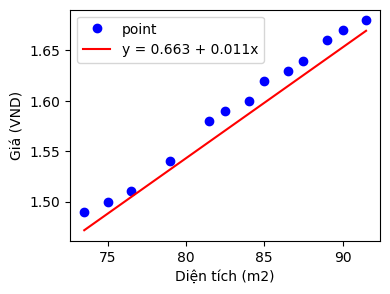

In [ ]:
# Test
# bài tâp 1
data_X = [73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]
data_Y = [1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]

# bài tập 2
# data_X = [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]
# data_Y = [ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]





w1 = w_1_linear_regression(data_X, data_Y)
w0 = w_0_linear_regression(data_X,data_Y)
loss = loss_regression_func(data_X, data_Y)
print(f'Phương trình linear regression: y = {round(w0,3)} + {round(w1,3)}x')
print(f'loss: {loss}')

# Visualize data
data_X = np.array(data_X)
data_Y = np.array(data_Y)
y = round(w0,3) + round(w1,3)*data_X
plt.figure(figsize=(4, 3))
plt.plot(data_X, data_Y, 'bo', label="point")
plt.plot(data_X, y, 'r', label=f'y = {round(w0,3)} + {round(w1,3)}x')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá (VND)')
plt.legend()
plt.show()

In [135]:
from sklearn import datasets, linear_model

data_X = [73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]
data_Y = [1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]


data_X = np.array([data_X]).T
one = np.ones((data_X.shape[0], 1))

data_X = np.concatenate((one, data_X), axis = 1)

data_Y = np.array(data_Y)

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(data_X, data_Y)

# Print kết quả
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Solution found by scikit-learn  :  [0.6626459 0.0111841]
Interception  :  0.0


4. Nhược điểm của linear regression

  Hạn chế đầu tiên của Linear Regression là nó rất nhạy cảm với nhiễu (sensitive to noise) \\
  Hạn chế thứ hai của Linear Regression là nó không biễu diễn được các mô hình phức tạp.

# Hồi quy tuyến tính đa biến (Multiply regression)

>1 . Giới thiệu \\
  Hồi qui tuyến tính đa biến là hồi qui tuyến tính với nhiều hơn một biến đầu vào. Hồi qui tuyến tính đa biến phổ biến hơn so với đơn biến vì trên thực tế rất hiếm các tác vụ dự báo chỉ gồm một biến đầu vào. Phương trình hồi qui của nó có dạng:
\begin{align}
\hat{y} = f(x_1,x_2,...,x_p) &= w_o + w_1x_{i1} + ... +w_px_{ip} = \mathbf{w}^T\mathbf{x}_i \\
&= \begin{bmatrix}
        1  \\
        1  \\
        :  \\
        :  \\
        1  
        \end{bmatrix}. w_0 + 
\begin{bmatrix}
       x_{11} \\
       x_{21} \\
       :      \\
       :      \\
       x_{21} \\        
\end{bmatrix}. w_1 + ... +
\begin{bmatrix}
       x_{1p} \\
       x_{2p} \\
       :      \\
       :      \\
       x_{np} \\        
\end{bmatrix}. w_p \\
 \\
\hat{y} = f(x) &= \begin{bmatrix}
        1 & x_{11} & ... & x_{1p} \\
        1 & x_{21} & ... & x_{2p} \\
        : & :      & ... & :      \\
        : & :      & ... & :      \\
        1 & x_{21} & ... & x_{np} 
        \end{bmatrix}.
        \begin{bmatrix}
                              w_0  \\
                              w_1  \\
                              :    \\
                              :    \\
                              w_p  \\
        \end{bmatrix}
        =\bar{X}\mathbf{w}
\end{align}

2. Sai số dự đoán 
Phương trình có dạng:
\begin{align}
e = (y - \hat{y}) = \mathbf{y} - \bar{X}\mathbf{w}
\end{align}

3. Hàm mất mát loss:

\begin{align}
\mathcal{L}(w) &= \frac{1}{2n}\sum_{i=1}^n(y_i-\hat{y})^2 \\
&=\frac{1}{2n}e^Te &= \frac{1}{2n}(\mathbf{y} - \bar{X}\mathbf{w})^T(\mathbf{y} - \bar{X}\mathbf{w})
\end{align}

>Đạo hàm phương trình trên ta được:

 \begin{align}
  \frac{\delta(\mathcal{L}(w))}{\delta{w}} &= \bar{X}^T(\bar{X}\mathbf{w} - \mathbf{y})
  \end{align}
>suy ra:
 \begin{align}
  \mathbf{w} &= (\bar{X}^T\bar{X})^{-1}(\bar{X} \mathbf{y})
  \end{align}


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [122]:
# area
x1 = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1, x2], axis = 1)


# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

In [123]:
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias

regr.fit(X, y)

# Compare two results
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ ) #0.0125 0.0013   I0.5367

Coefficient :  [[0.01252422 0.00130004]]
Interception  :  [0.53665806]


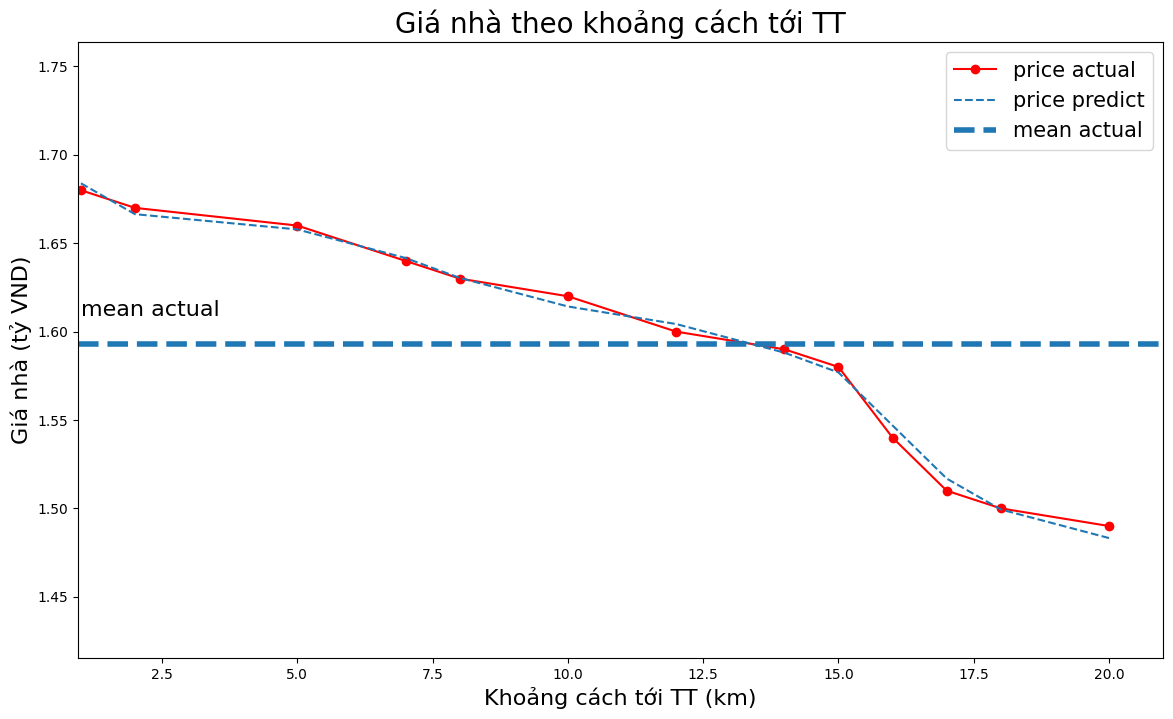

In [127]:
ypred = regr.predict(X)
# Visualize data
def _plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(14, 8))
  plt.plot(x, y_act, 'r-o', label="price actual")
  plt.plot(x, y_pred, '--', label="price predict")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y_act)
  y_max = np.max(y_act)
  # mean price
  ybar = np.mean(y_act)
  plt.axhline(ybar, linestyle='--', linewidth=4, label="mean actual")
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.text(x_min, ybar*1.01, "mean actual", fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()


_plot_act_pred(x2, y, ypred, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT (km)', 
      ylabel='Giá nhà (tỷ VND)')

In [ ]:
# plt.figure(figsize=(8, 3))
# plt.plot(x1, y, 'r-o', label="point")
# plt.title ('Giá nhà theo khoảng cách tới TT')  
# plt.xlabel('Khoảng cách tới TT (km)')
# plt.ylabel('Giá nhà (tỷ VND)')

# plt.figure(figsize=(8, 3))
# plt.plot(x2, y, 'b-o', label="point")
# plt.title ('Giá nhà theo khoảng cách tới TT')  
# plt.xlabel('Khoảng cách tới TT (km)')
# plt.ylabel('Giá nhà (tỷ VND)')

Bài tập:  Số liệu về sản lượng Y , phân hóa học X2, thuốc trừ sâu X3, tính trên
một đơn vị diện tích ha, cho trong bảng sau: \\
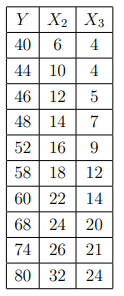 \\

Với mức ý nghĩa 5%, hãy trả lời các câu hỏi sau:
1. Kết quả ước lượng có phù hợp với thực tế không? Hãy giải thích ý nghĩa kinh
tế của các hệ số nhận được.
2. Phân bón có ảnh hưởng đến năng suất của loại cây trồng trên hay không?
câu hỏi tương tự cho thuốc trừ sâu.
3. Hãy tìm khoảng tin cậy cho các hệ số hồi quy riêng?
4. Hãy giải thích ý nghĩa của hệ số R2 nhận được? tính hệ số xác định hiệu
chỉnh?
5. Có phải cả phân bón lẫn thuốc trừ sâu đều không ảnh hưởng đến năng suất?
6. Bạn có thể bỏ biến X3 ra khỏi mô hình được không? Vì sao?
7. Phải chăng phân bón và thuốc trừ sâu đều có ảnh hưởng như nhau đến năng
suất cây trồng trên?
8. Hãy dự báo giá trị trung bình và cá biệt khi X2 = 20; X3 = 15 \\
Nguồn: bài tập kinh tế lượng - ThS. Lê Trường Giang

In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [58]:
X2 = [6, 10, 12, 14, 16, 18, 22, 24, 26, 32]
X3 = [4, 4, 5, 7, 9, 12, 14, 20, 21, 24]
Y  = [40, 44, 46, 48, 52, 58, 60, 68, 74, 80]

570


In [71]:
X2 = [6, 10, 12, 14, 16, 18, 22, 24, 26, 32]
X3 = [4, 4, 5, 7, 9, 12, 14, 20, 21, 24]
Y  = [40, 44, 46, 48, 52, 58, 60, 68, 74, 80]

# Dùng sklearn
X2 = np.array([X2]).T
X3 = np.array([X3]).T
Y  = np.array([Y]).T

X = np.concatenate([X2, X3], axis = 1)

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias

regr.fit(X, Y)

# Compare two results
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[0.65005086 1.10986775]]
Interception  :  [31.98067141]


In [113]:
X2 = [6, 10, 12, 14, 16, 18, 22, 24, 26, 32]
X3 = [4, 4, 5, 7, 9, 12, 14, 20, 21, 24]
Y  = [40, 44, 46, 48, 52, 58, 60, 68, 74, 80]

X2 = np.array([X2]).T
X3 = np.array([X3]).T
Y  = np.array([Y]).T


X = np.concatenate([X2, X3], axis = 1)

# Thêm vecto w_0 là vector 1 vào ma tran
one = np.ones((X.shape[0], 1))
X   = np.concatenate((one, X), axis = 1)
XT  = np.transpose(X)

A = np.dot(XT,X)
b = np.dot(XT,Y)
w = np.dot(np.linalg.inv(A) ,b)

# Coefficient :  [[0.65005086 1.10986775]]
# Interception  :  [31.98067141]

print( 'Coefficient   : ', w[1], w[2])
print( 'Interception  : ', w[0] )

Coefficient   :  [0.65005086] [1.10986775]
Interception  :  [31.98067141]


In [146]:
n = len(Y)
mean_Y = sum(Y)/n
Sum_of_Y_square = sum([y**2 for y in Y])


TSS = Sum_of_Y_square-10*mean_Y**2
ESS = np.dot(np.transpose(w),b) - 10*mean_Y**2
RSS = TSS - ESS
R_square = ESS/TSS

sigma_square =  RSS/(10-3)

cov_b_hat = sigma_square* np.linalg.inv(A)

print(f'TSS :{TSS}')
print(f'ESS :{ESS}')
print(f'RSS :{RSS}')
print(f'R_square     : {R_square}')
print(f'sigma_square : {sigma_square}')
print(f'cov_b_hat : \n{cov_b_hat}')


TSS :[1634.]
ESS :[[1620.32960326]]
RSS :[[13.67039674]]
R_square     : [[0.99163378]]
sigma_square : [[1.95291382]]
cov_b_hat : 
[[ 2.66275727 -0.34568363  0.31290328]
 [-0.34568363  0.06258066 -0.06506402]
 [ 0.31290328 -0.06506402  0.07152075]]


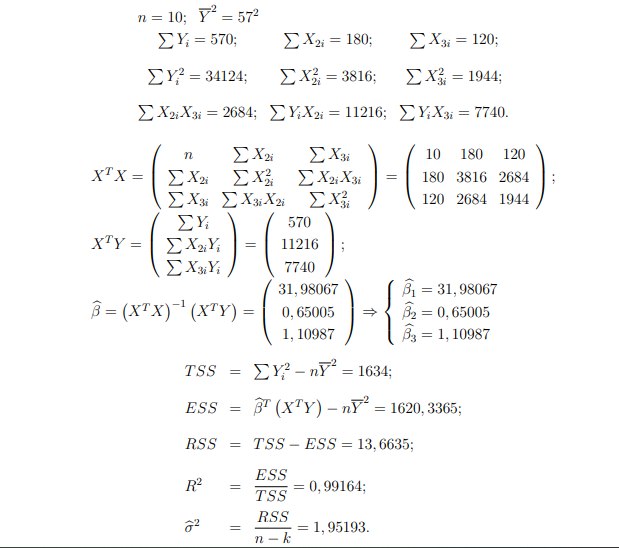

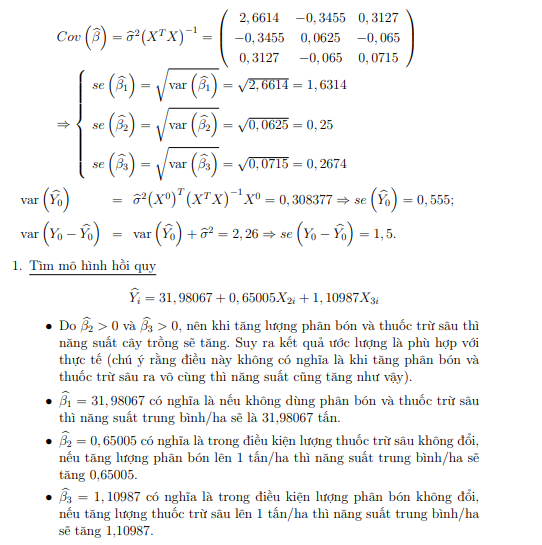

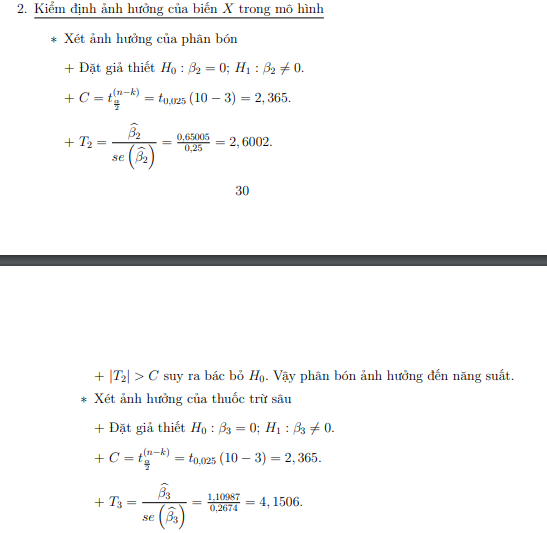

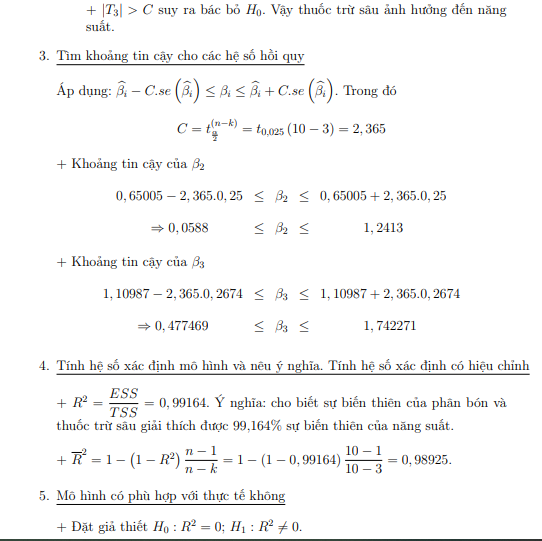

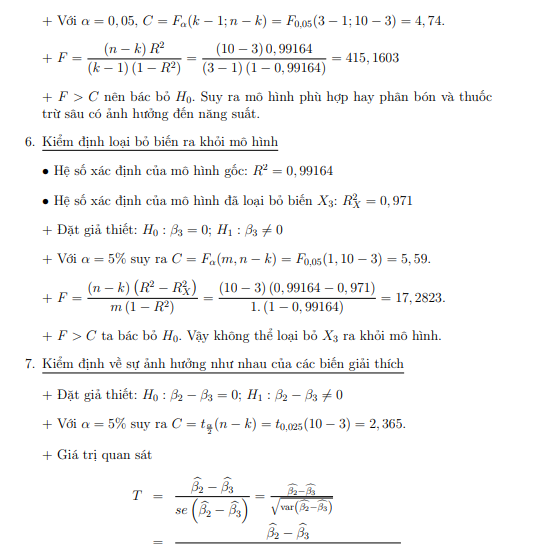

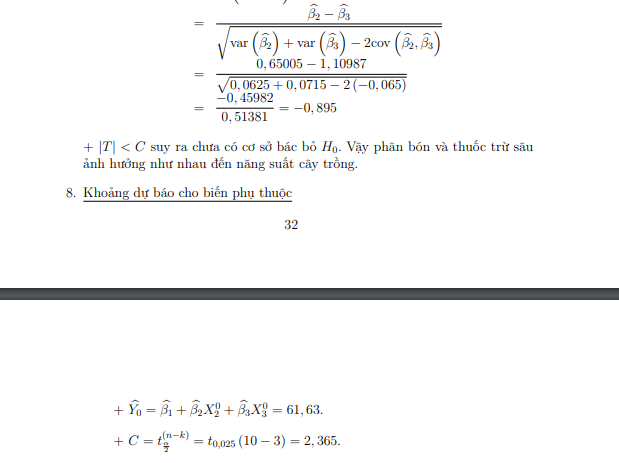

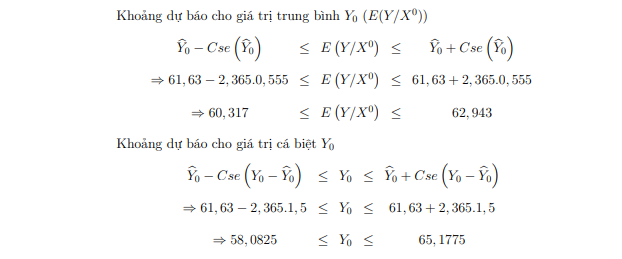